In [23]:
import math 
import pandas_datareader as web 
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential  #load_model
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [24]:
# get the stock quote of a corporation (Apple Inc.)
# df = web.DataReader('AAPL', data_source = 'yahoo', start = '2012-01-01', end = '2021-12-17')
# df = pd.read_csv('../db/Tesla.csv')
# df = pd.read_csv('../db/AAPL.csv')
df = pd.read_csv('../db/IBM.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-10-11,138.789993,139.940002,138.639999,139.660004,97.898521,4004300
1,2010-10-12,138.399994,139.990005,138.270004,139.850006,98.031708,5637300
2,2010-10-13,139.910004,141.479996,139.779999,140.369995,98.396217,8784300
3,2010-10-14,140.350006,141.500000,139.690002,141.500000,99.188316,5653100
4,2010-10-15,142.100006,142.100006,140.539993,141.059998,98.879852,7220400
...,...,...,...,...,...,...,...
2700,2021-07-02,146.910004,146.949997,139.460007,140.020004,140.020004,16811200
2701,2021-07-06,139.990005,140.419998,137.100006,138.779999,138.779999,8093700
2702,2021-07-07,138.759995,140.330002,138.759995,139.820007,139.820007,4059700
2703,2021-07-08,137.779999,141.309998,137.660004,140.740005,140.740005,5487400


In [25]:
# get the number of rows and columns in the data set
df.shape

(2705, 7)

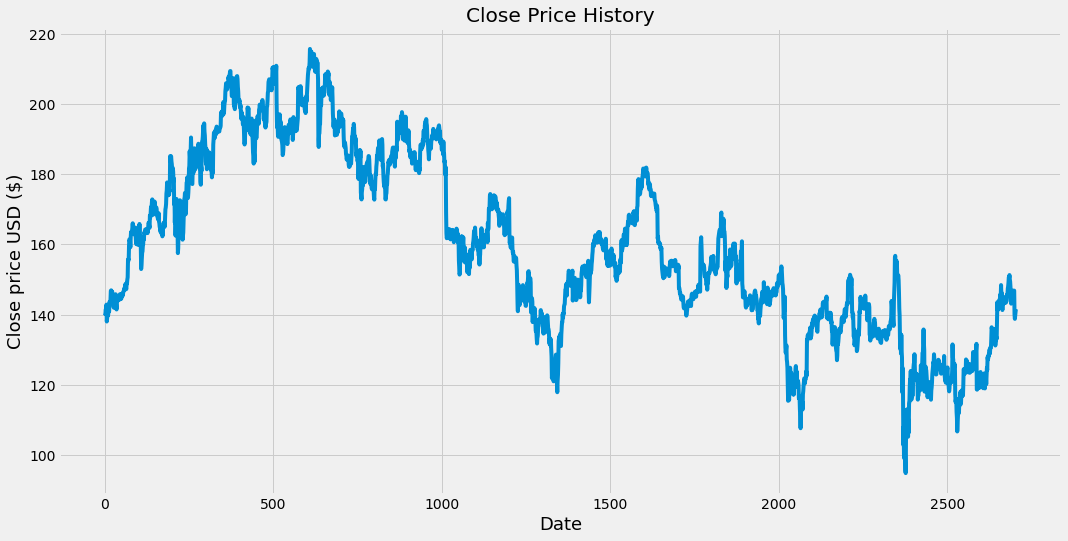

In [26]:
# visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.show()

In [27]:
# create a new df with only the "close" column
data = df.filter({'Close'})
# convert the df to a numpy array
dataset = data.values
# get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

2164

In [28]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[0.37089982],
       [0.37246969],
       [0.37676606],
       ...,
       [0.37222183],
       [0.37982323],
       [0.38626791]])

In [29]:
## create the training data set
# create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
# split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

print(x_train)
print(y_train)

5981987722945331, 0.6071221957966356, 0.5967115956352179, 0.6028257075356999, 0.6101792476156697, 0.5965463143082054, 0.5891927742282356, 0.5840701189422398, 0.5634966588368177, 0.5609353353250267, 0.5760555609656005, 0.581012934924584, 0.578038465932159, 0.5802693507261331, 0.5650665422589501, 0.5707676243525924, 0.596381032981193, 0.6164587647793721, 0.6100966730514746, 0.609435663417219, 0.6298438339332147, 0.6423200375615944, 0.648186400982249, 0.5643229497980856, 0.5418491758151281, 0.5532512243286182, 0.5368916779199365, 0.5312732943266979, 0.5393704268675324, 0.5479632794531962, 0.5468892565369284, 0.5553995262959831, 0.5282988253342727, 0.519127537678549, 0.5216061626899365, 0.5085516561901188, 0.49863666039973575, 0.5121044363163957, 0.5018590018081962, 0.5072296451840214, 0.49822363885530996, 0.5038420224485488, 0.5084689576897153, 0.5059902087421196, 0.48888706987257347, 0.4783111966465571, 0.446831416334888, 0.40237958841380206, 0.3816409791799894, 0.4290671521572923, 0.444

In [30]:
# convert the x_train and y_train to number arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [31]:
# reshape the data, input [samples, time steps, features] which is require for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2104, 60, 1)

In [32]:
# build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [33]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [34]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)
# model.save('../out/APPL_LSTM_1.h5')

2104/2104 [==============================] - 111s 50ms/step - loss: 0.0052


In [35]:
## create the testing data set
# create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:, :]
# create the data sets x_test nad y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [36]:
# convert the data to a numpy array
x_test = np.array(x_test)

In [37]:
# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [38]:
# get the models predicted price values
# model = load_model('../out/APPL_LSTM_1.h5')
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [39]:
# get the rmse (root mean squared error)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.18207782362938257

<ipython-input-40-dc49c41f9a97>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


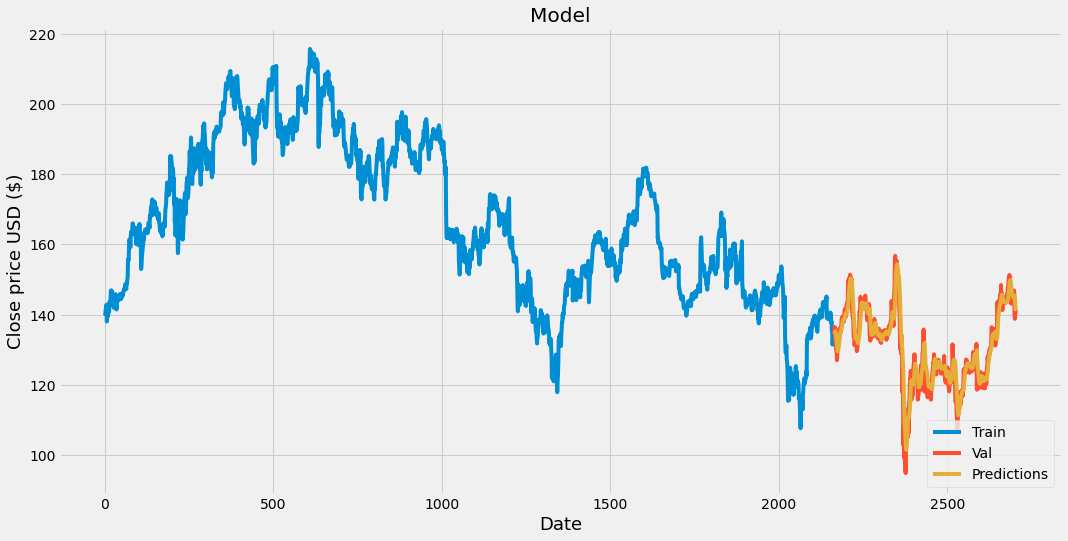

In [40]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [41]:
# show the valid and predicted prices
valid

,Close,Predictions
2164,134.320007,134.200180
2165,135.119995,134.189743
2166,136.449997,134.333649
2167,136.350006,134.756317
2168,132.389999,135.214645
...,...,...
2700,140.020004,145.519424
2701,138.779999,144.571533
2702,139.820007,143.086014
2703,140.740005,141.811340


In [42]:
valid.index=pd.to_datetime(df['Date'].loc[training_data_len:].copy())
# valid.to_csv('../out/Tesla_LSTM_1.csv')
# valid.to_csv('../out/AAPL_LSTM_1.csv')
valid.to_csv('../out/IBM_LSTM_1.csv')
valid

,Close,Predictions
Date,,
2019-05-17,134.320007,134.200180
2019-05-20,135.119995,134.189743
2019-05-21,136.449997,134.333649
2019-05-22,136.350006,134.756317
2019-05-23,132.389999,135.214645
...,...,...
2021-07-02,140.020004,145.519424
2021-07-06,138.779999,144.571533
2021-07-07,139.820007,143.086014


In [43]:
# ## predict stock price of Apple for 18/12/2019
# # create a new df get teh last 60 days closing price values and convert the df to an array
# last_60_days = data[-60:].values
# # scale the data to be values betweeen 0 and 1
# last_60_days_scaled = scaler.transform(last_60_days)
# # create an empty list
# X_test = [] 
# # append teh past 60 days
# X_test.append(last_60_days_scaled)
# # convert the X_test data set to a numpy array
# X_test = np.array(X_test)
# # reshape the data
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
# # get the predicted scaled price
# pred_price = model.predict(X_test)
# # undo the scaling
# pred_price = scaler.inverse_transform(pred_price)
# print(pred_price)

In [44]:
# # get the quote 18/12/2019
# val = web.DataReader('AAPL', data_source = 'yahoo', start = '2019-12-18', end = '2019-12-18')
# val['Close']